---
title: 5.1 Linear Functions
subject: Linearity
subtitle: a simple function class
short_title: 5.1 Linear Functions
authors:
  - name: Nikolai Matni
    affiliations:
      - Dept. of Electrical and Systems Engineering
      - University of Pennsylvania
    email: nmatni@seas.upenn.edu
license: CC-BY-4.0
keywords: linear functions, matrix-vector multiplication, composition, inverse
math:
  '\vv': '\mathbf{#1}'
  '\bm': '\begin{bmatrix}'
  '\em': '\end{bmatrix}'
  '\R': '\mathbb{R}'
---

[![Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/nikolaimatni/ese-2030/HEAD?labpath=/04_Ch_5_Linearity/061-Linear_functions.ipynb)

{doc}`Lecture notes <../lecture_notes/Lecture 10 - Linearity, Linear Functions, Transformations, and Operators.pdf>`

## Reading

Material related to this page, as well as additional exercises, can be found in ALA 7.1.

## Learning Objectives

By the end of this page, you should know:
- definition of Linear functions and some examples
- how to verify linearity of functions
- how matrix-vector multiplication relates to linear functions
- composition of linear functions
- inverses of linear functions

## Introduction to Linearity

A strategy that we have embraced so far has been to turn algebraic questions into geometric ones. Our foundation for this strategy has been the vector space, which allows us to reason abut a wide range of objects (vectors, polynomials, word histograms, and functions) as “arrows” that we can add, stretch, flip and rotate. Our canonical approach to transforming one vector into another has been through matrix-vector multiplication: we start with a vector $\vv x$ and create a new vector via the mapping $\vv x \mapsto A \vv x$.

Our goal in this lecture is to give you a brief introduction to the theory of _linear functions_, of which the function
$f(\vv x) =A \vv x$, is a special case. Linear functions are also known as linear maps, or when applied to function spaces, linear operators. These functions lie at the heart of robotics, computer graphics, quantum mechanics, and dynamical systems. We will see that by introducing just a little bit more abstraction, we can reason about all of these different settings using the ere mathematical machinery.

## Linear Functions

We start with the basic definition of a _linear function_ which captures the fundamental idea of linearity: closed under addition and scalar multiplication. A formal definition is given below.
:::{prf:definition} Linear Function
:label: linear_fn_defn
Let $V$ and $W$ be a real vector space. A function $L:V \to W$ mapping the _domain $V$_ to the _codomain $W$_ is called _linear_ if it obeys two basic rules:
\begin{equation}
\label{linear_fn_eqn}
L(\vv v+ \vv w) &= L(\vv v) + L(\vv w) \ &\text{(L1)} \\
L(c\vv v) &= cL(\vv v) \ &\text{(L2)}
\end{equation}
for all $\vv v,\vv w \in V$ and $c \in \mathbb{R}$.
:::

Before looking at some common examples, we make a few comments:
:::{note} Comments
1. Setting $c = 0$ in [rule (L2)](#linear_fn_eqn) tells us that a linear function always maps the zero element $\vv 0 \in V$ to the zero element $\vv 0 \in W$ (**note: these are different zero elements as they live in different vector spaces!**).
2. A commonly used trick for verifying linearity is to combine [(L1)](#linear_fn_eqn) and [(L2)](#linear_fn_eqn) into the single rule:
\begin{equation}
\label{linear_fn_rule}
L(c\vv v + d\vv w) = cL(\vv v) + dL(\vv w)\quad \text{for all} \quad \vv v, \vv w \in V, \quad c,d \in \mathbb{R} \quad \text{(L)}
\end{equation}
3. We can extend [rule (L)](#linear_fn_rule) to any finite linear combination:
\begin{equation}
\label{linear_comb}
L(c_1\vv v_1 + \cdots + c_k\vv v_k) = c_1L(\vv v_1) + \cdots + c_kL(\vv v_k) \quad \text{(LL)}
\end{equation}
for all $c_1,\ldots,c_k \in \mathbb{R}$ and $\vv v_1,\ldots,\vv v_k \in V$.

:::

:::{note} Terminology
Finally a quick note on terminology: we will use _linear function_ and _linear map_ interchangeably when $V$ and $W$ are both finite dimensional, _linear transformation_ when $V = W$, and _linear operator_ when $V$ and $W$ are function spaces.
:::

:::{prf:example}Zero, Identity, and Scalar Multiplication Functions
:label: zero_id_scale_eg
1. The zero function $O(\vv v) = \vv 0$ which maps any $\vv v \in V$ to $\vv 0 \in W$ is easily checked to satisfy [rule (L)](#linear_fn_rule) (both sides are zero!).
2. The identity function $I(\vv v) = \vv v$, which leaves any vector $\vv v \in V$ unchanged satisfies [rule (L)](#linear_fn_rule) because both $I(c\vv v + d\vv w) = c\vv v + d\vv w$ and $cI(\vv v) + dI(\vv w) = c\vv v + d\vv w$.
3. The scalar multiplication function $M_a(\vv v) = a\vv v$ which scales an element $\vv v \in V$ by the scalar $a \in \mathbb{R}$ defines a linear function from $V$ to itself, with $M_0(\vv v) = O(\vv v)$ and $M_1(\vv v) = I(\vv v)$ appearing as special cases.
:::

:::{note}
We made no assumptions about $V$ and $W$ in [](#zero_id_scale_eg) beyond them being vector spaces.They could be Eucledian spaces, function spaces, or even matrix spaces, and our statements would be equally valid.
:::

:::{prf:example} Matrix Multiplication

Let $V = \mathbb{R}^n$ and $W = \mathbb{R}^m$, and $A \in \mathbb{R}^{m \times n}$. Then the function $L(\vv v) = A\vv v$ is a linear function since:
$$
A(c\vv v + d\vv w) = cA\vv v + dA\vv w \ \text{for all} \ \vv v,\vv w \in \mathbb{R}^n \ \text{and} \ c,d \in \mathbb{R}
$$
by the basic properties of matrix-vector multiplication.

In fact, matrix-vector multiplications are not only a familiar example of linear maps between Eucledian space, they are the **only ones**! 
:::


::::{prf:theorem}
:label: linear_fn_thm
Every linear function $L: \mathbb{R}^n \to \mathbb{R}^m$ is given by matrix-vector multiplication, $L(\vv v) = A\vv v$, for some $A \in \mathbb{R}^{m \times n}$.

:::{prf:proof} Proof of [](#linear_fn_thm)
:label: proof-linear_fn_thm
:class: dropdown

The key idea is to apply the linear combination property [(LL)](#linear_comb) to the expression $\vv v = v_1 \vv e_1 + \cdots + v_n \vv e_n$ of $\vv v$ in the standard basis of $\mathbb{R}^n$:
\begin{align*}
L(\vv v) &= L(v_1 \vv e_1 + \cdots + v_n \vv e_n) \\
&\overset{(LL)}{=} v_1 L(\vv e_1) + v_2 L(\vv e_2) + \cdots + v_n L(\vv e_n) \\
&= \bm L(\vv e_1) \quad L(\vv e_2) \quad \cdots \quad L(\vv e_n) \em
\begin{bmatrix}
v_1 \\
v_2 \\
\vdots \\
v_n
\end{bmatrix} \\
&= A \vv v, \ \text{where}, \ A = \bm L(\vv e_1) \quad L(\vv e_2) \quad \cdots \quad L(\vv e_n) \em, \ \vv v = \begin{bmatrix}
v_1 \\
v_2 \\
\vdots \\
v_n
\end{bmatrix}
\end{align*}
Thus we have shown that the way to find the _matrix representation_ of a linear function is to evaluate it on the basis elements and then stack them into a matrix $A = \bm L(\vv e_1) &L(\vv e_2) & \cdots & L(\vv e_n)\em$.
:::
::::

:::{warning}
Pay attention to the order of $m$ and $n$: when $L: \mathbb{R}^n \to \mathbb{R}^m$, from $\mathbb{R}^n$ to $\mathbb{R}^m$ , $A \in \mathbb{R}^{m \times n}$, with $m$ rows and $n$ columns!
:::

::::{prf:example} 2D rotators
:label: 2d_rot_eg
Let's consider the function $R_{\theta}: \mathbb{R}^2 \to \mathbb{R}^2$ that rotates a vector ${\vv v \in \mathbb{R}^2}$ counter-clockwise by $\theta$ radians. To find its matrix representation, we look at the [figure](#2d_rotation) below and apply a little high school trigonometry (SOHCAHTOA anyone?).
:::{figure}../figures/06-2d_rotation.jpg
:label:2d_rotation
:alt:2D Rotation
:width: 400px
:align: center
:::
Recalling that $\|\vv e_1\| = \|\vv e_2\| = 1$, and that rotating vectors preserve length, we have:
$$
R_{\theta} (\vv e_1) = \begin{bmatrix} \cos \theta \\ \sin \theta \end{bmatrix}, \quad
R_{\theta} (\vv e_2) = \begin{bmatrix} -\sin \theta \\ \cos \theta \end{bmatrix}
$$
which, when stacked together, give the matrix representation $R_{\theta} (\vv v) = A_{\theta} \vv v$ with
\begin{equation}
\label{A_rot}
A_{\theta} = \begin{bmatrix} \cos \theta & -\sin \theta \\ \sin \theta & \cos \theta \end{bmatrix}
\end{equation}
This looks familiar! Indeed, [this](#A_rot) is the same expression we found when characterizing [orthogonal 2x2 matrices](../03_Ch_4_Orthogonality/053-orthogonal_matrices.ipynb#orthogonal-matrices-ex1). If we then apply $\vv v \mapsto A_{\theta} \vv v$ we obtain:
$$
\hat{\vv v} = R_{\theta} (\vv v) = A_{\theta} \vv v = \begin{bmatrix} \cos \theta & -\sin \theta \\ \sin \theta & \cos \theta \end{bmatrix} \begin{bmatrix} v_1 \\ v_2 \end{bmatrix} = \begin{bmatrix} v_1 \cos \theta - v_2 \sin \theta \\ v_1 \sin \theta + v_2 \cos \theta \end{bmatrix}
$$
which you can check are correct using trigonometry, but follow directly from the linearity of rotation.
::::

#### Python break!

In the below example, we illustrate the rotation of vectors in Python by constructing a rotation matrix as given in [](#2d_rot_eg) and applying the linear transform to the original vector.

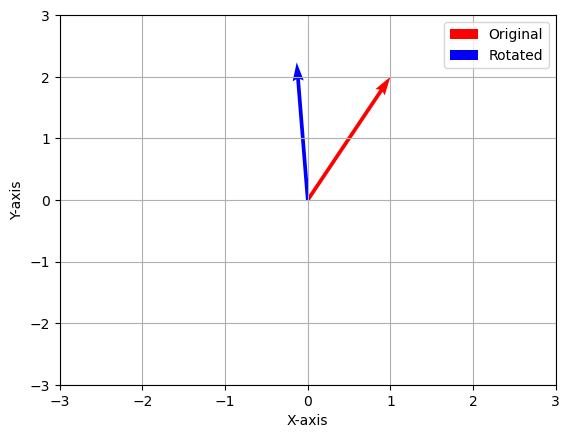

In [18]:
import numpy as np
import matplotlib.pyplot as plt

def plot_vecs(origin, v1, v2):
    fig, ax = plt.subplots()
    ax.quiver(*origin, *v1, angles='xy', scale_units='xy', scale=1, color='r', label='Original')
    ax.quiver(*origin, *v2, angles='xy', scale_units='xy', scale=1, color='b', label='Rotated')
    ax.set_xlim(-3, 3)
    ax.set_ylim(-3, 3)
    plt.legend()
    plt.grid()
    ax.set_xlabel('X-axis')
    ax.set_ylabel('Y-axis')
    plt.show()

def rot_mat_cons(theta):
    return np.array([[np.cos(theta), -np.sin(theta)], [np.sin(theta), np.cos(theta)]])
    
theta = np.pi/6 # change this and observe how much the vector is rotated
rot_mat = rot_mat_cons(theta)

v1 = np.array([[1, 2]]).T
v2 = rot_mat @ v1

# Define the origin
origin = np.array([[0, 0]]).T

plot_vecs(origin, v1, v2)

## Composition

Applying one linear function after another is called _composition_: let $V, W, Z$ be vector spaces. If $L: V \to W$ and $M: W \to Z$ are linear functions, then the _composite function_ $M \circ L: V \to Z$, defined by $(M \circ L)(\vv v) = M(L(\vv v))$, is also linear (easily checked to satisfy rule [(L)](#linear_fn_rule)).

This gives us a "dynamic" interpretation of matrix-matrix multiplication. If $L(\vv v) = A\vv v$ maps $\mathbb{R}^n$ to $\mathbb{R}^m$ and $M(\vv w) = B\vv w$ maps $\mathbb{R}^m$ to $\mathbb{R}^l$, so that $A \in \mathbb{R}^{m \times n}$ and $B \in \mathbb{R}^{l \times m}$, then:
$$
(M \circ L)(\vv v) = M(L(\vv v)) = B(A\vv v) = (BA)\vv v
$$
so that the matrix representation of $M \circ L: \mathbb{R}^n \to \mathbb{R}^l$ is the matrix product $BA \in \mathbb{R}^{l \times n}$. And, like matrix multiplication, composition of linear functions is in general not commutative (order of applying the function matters!)

:::{prf:example}Composing rotations
:label: comp_rot_eg
Composing two rotations results in another rotation: $R_{\phi} \circ R_{\theta} = R_{\phi + \theta}$, i.e., if we first rotate by $\theta$ and then by $\phi$, it is the same as rotating by $\theta + \phi$. Using matrices:

$$
\begin{bmatrix} \cos \phi & -\sin \phi \\ \sin \phi & \cos \phi \end{bmatrix} \begin{bmatrix} \cos \theta & -\sin \theta \\ \sin \theta & \cos \theta \end{bmatrix} = A_{\phi} A_{\theta} = A_{\phi+\theta} = \begin{bmatrix} \cos( \phi+\theta) & -\sin(\phi+\theta) \\ \sin(\phi+\theta) & \cos(\phi+\theta) \end{bmatrix}
$$
Working out the LHS above, we can derive the well-known trigonometric addition formulas:

$$
cos(\phi+\theta) =  \cos \phi \cos \theta-  \sin \phi \sin \theta, \quad \sin(\phi+\theta) = \cos \phi \sin \theta + \sin \phi \cos \theta
$$
In fact, this counts as a proof!
:::

#### Python break!

In the below code, we illustrate composition of rotations in Python by multiplying rotation matrices.

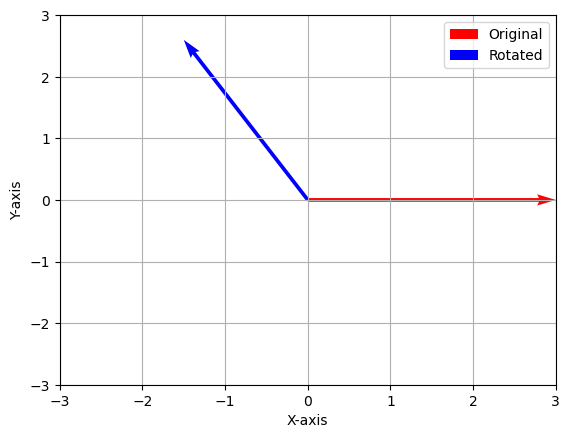

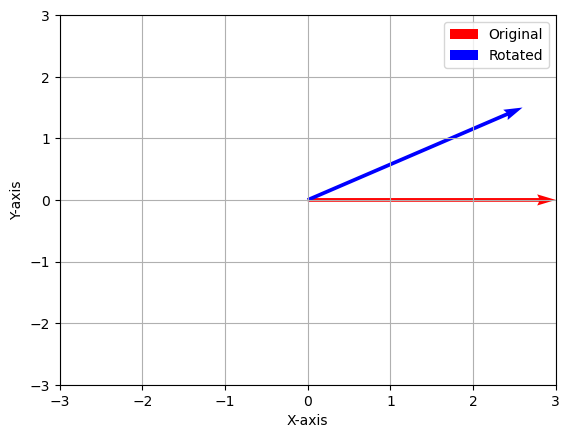

In [31]:
theta1 = np.pi/6
theta2 = np.pi/2

rot1 = rot_mat_cons(theta1)
rot2 = rot_mat_cons(theta2)

v1 = np.array([[3, 0]]).T
v2 = rot1 @ rot2 @ v1 # composition of rotations

plot_vecs(origin, v1, v2)

## A reverse rotation

theta3 = -np.pi/2

rot3 = rot_mat_cons(theta3)

v3 = rot3 @ rot1 @ rot2 @ v1 # How can you get to v3 from v2?

plot_vecs(origin, v1, v3)

## Inverses

Just as with square matrices, we can define the inverse of a linear function. Let $L: V \to W$ be a linear function. If $M: W \to V$ is a _linear function_ such that:

$$
L \circ M = I_W \quad \text{and} \quad M \circ L = I_V
$$

where $I_W$ and $I_V$ are identity maps on $W$ and $V$ respectively, then $M$ is the _inverse of $L$_ and is denoted $M = L^{-1}$.

::::{prf:example} Mapping polyamials $P^{(n)}$ to $\mathbb{R}^n$ and back again
:label: eg_poly_real_vec
Let $V = P^{(n)}$ be the space of polynomials of degree $\leq n$, and let $W = \mathbb{R}^{n+1}$. Define the linear map $L : P^{(n)} → \mathbb{R}^{n+1}$ as follows: for $p(x) = a_0 + a_1x + \cdots + a_nx^n$,
$$
L(p) =\bm
a_0 \\ a_1 \\ \vdots \\ a_n
\em,
$$
i.e, $L(p)$ stacks the coefficients of $p(x)$ into a vector $L(p) \in \mathbb{R}^{n+1}$.

The inverse map $L^{-1}(\vv a)$ is simply the mapping that takes a vector $\vv a = \bm a_0 ,a_1, \ldots, a_n\em^{\top} \in \mathbb{R}^{n+1}$ and outputs the polynomial $L^{−1}(\vv a)(x) = a_0 + a_1x + \cdots + a_nx^n$. We check that it
satisfies
$$
L \circ L^{−1} = I_{\mathbb{R}^{n+1}} \ \text{and} \ L^{−1} \circ L = I_{p^{(n)}}
$$
First,
$$(L \circ L^{−1})(\vv a) = L (L^{−1}(\vv a)) = L((a_0 + a_1x + \cdots + a_nx^n) = \bm
a_0\\ a1\\ \vdots \\ a_n \em = \vv a
$$
for any $\vv a \in \mathbb{R}^{n+1}$, so that $L \circ L^{−1} = I_{\mathbb{R}^{n+1}}$. Next, we check, for any, $p(x) =
a_0 + a_1x+ \cdots + a_nx^n$ :
$$
(L^{−1} \circ L) (p) = L^{−1}(L(p)) = L^{−1}\left(\bm
a_0 \\ a_1 \\ \vdots \\ 
a_n \em \right) = L^{−1}(\vv a) = a_0+a_1×+ \cdots +a_nx^n = p(x)
$$
So that $L^{−1}\circ L = I_{p(n)}$.

:::{note} Isomoprhic
:label: iso_state
Because there exists an invertible linear map between $\mathbb{R}^{n+1}$  and $P^{(n)}$, they are
said to be _isomorphic_. As we saw earlier in the semester, this means that "they behave the same" and we can do vector space operations in either $\mathbb{R}^{n+1}$ or $P^{(n)}$, whichever is convenient to us.
:::
::::

:::{note}
A more general statement can be made than the previous one: **any** vector space of dimension $n$ is isomorphic to $\mathbb{R}^n$, and so by studying Eucledian space, we in fact are gaining an
understanding of _all finite dimensional vector spaces_.
:::

[![Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/nikolaimatni/ese-2030/HEAD?labpath=/04_Ch_5_Linearity/061-Linear_functions.ipynb)